### Importing Relevant Things 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2,mutual_info_classif,f_regression,f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

### Loading the modified dataset

In [2]:
df = pd.read_csv('dataset/data_merged.csv')
list(df.columns)

# Two of the columns containing almost constant values are eliminated because owing to their constant values, 
# they will not affect the output at all. 
del df['mode']
del df['key_6_yr']
#del df['popularity_ar']
#del df['popularity_yr']

In [5]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,speechiness_yr,tempo_yr,valence_yr,popularity_yr,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr
0,0.0131,0.2560,182347,0.895,0,0.000106,0.0821,-4.860,29,0.0707,...,0.064961,120.209319,0.583424,35.272231,0,0,1,0,0,0
1,0.9800,0.2770,206972,0.145,0,0.879000,0.1110,-19.898,0,0.0845,...,0.092591,110.008113,0.432251,3.672500,1,0,0,0,0,0
2,0.7950,0.6850,314667,0.483,0,0.878000,0.1130,-10.202,1,0.0337,...,0.103243,108.561912,0.447291,7.707000,0,0,0,1,0,0
3,0.6560,0.7880,179747,0.808,0,0.000000,0.1540,-6.590,0,0.0395,...,0.103243,108.561912,0.447291,7.707000,0,0,0,1,0,0
4,0.3020,0.0753,498560,0.150,0,0.884000,0.1210,-16.705,0,0.0371,...,0.107351,109.569882,0.443625,3.419500,1,0,0,0,0,0


### Linear Regression

In [3]:
# Define the feature dataset
X = df[df.columns.difference(['popularity'])]

# Define the value we want to predict
y = df['popularity']

In [4]:
# Splitting data in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initial Run

In [7]:
# Train linear regressor
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict on train data
y_pred_training = lin_reg.predict(X_train)

# Print r_2 scores and RMSE for training set
print('\033[1mFor Train Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_train, y_pred_training))
print('Root mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_train, y_pred_training)))

For Train Data
Coefficient of determination: 0.83094
Root mean squared error: 8.98600


In [8]:
# Predict on test data
y_pred = lin_reg.predict(X_test)

# Print r_2 scores and RMSE for test set
print('\033[1mFor Test Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_test, y_pred))
print('Root Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

For Test Data
Coefficient of determination: 0.83090
Root Mean squared error: 9.01120


#### Feature Selection
Now, we perform feature selection using the SelectKBest class in sklearn. First, we plot a graph of the co-efficient of determination vs. number of features and see how many features out of 70 we require to retain for sufficient accuracy. 

In [9]:
r_2scores = []
rmse = []

for i in range(1,68):
    EX = SelectKBest(f_regression, k =i).fit_transform(X,y)
    X_train, X_test, y_train, y_test = train_test_split(EX, y, test_size=0.2, random_state=42)
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r_2scores.append(r2_score(y_test, y_pred))

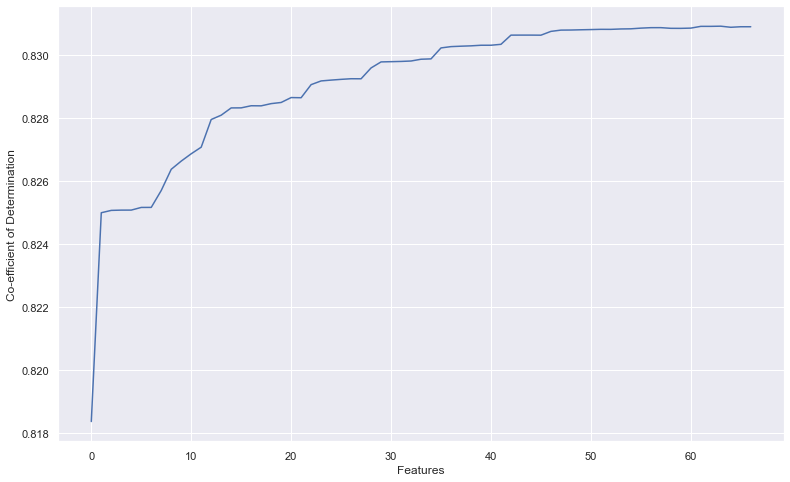

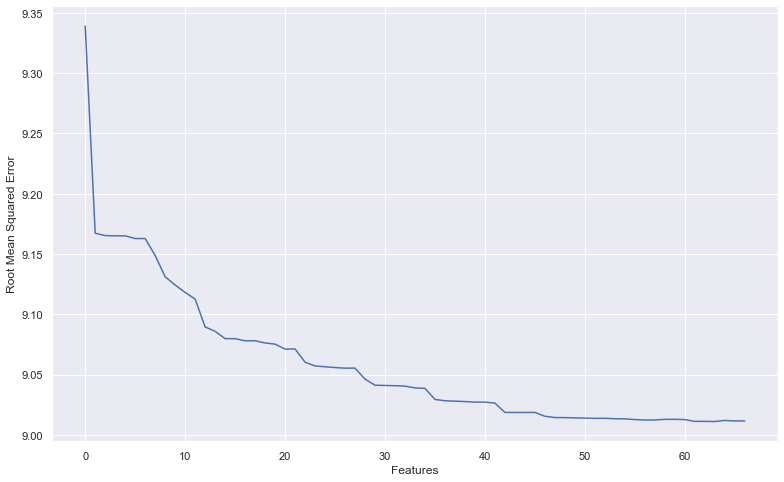

In [10]:
plt.figure(figsize = (13,8))
plt.plot(r_2scores)
plt.xlabel("Features")
plt.ylabel("Co-efficient of Determination")
plt.savefig('r2_score.png', pad_inches=0)
plt.show()

plt.figure(figsize = (13,8))
plt.plot(rmse)
plt.xlabel("Features")
plt.ylabel("Root Mean Squared Error")
plt.savefig('rmse.png', pad_inches=0)
plt.show()

#### Final Run

We see a clear jump in accuracy for the first few features after which the $r_2$ scores plateau. We pick $k = 27$ to be a fair number of features for linear regression after which the gain in accuracy is not worth the computing cost.

In [11]:
X_final = SelectKBest(f_regression, k =27).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train linear regressor
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict on train data
y_pred_training = lin_reg.predict(X_train)

# Print r_2 scores and RMSE for training set
print('\033[1mFor Train Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_train, y_pred_training))
print('Root mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_train, y_pred_training)))

For Train Data
Coefficient of determination: 0.82910
Root mean squared error: 9.03496


In [12]:
# Predicting on test data
y_pred = lin_reg.predict(X_test)

# Print r_2 scores and RMSE for test set
print('\033[1mFor Test Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_test, y_pred))
print('Root Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

For Test Data
Coefficient of determination: 0.82924
Root Mean squared error: 9.05530


### Polynomial Regression

In [13]:
# Specify the degree of polynomial features

poly = PolynomialFeatures(degree=2) # Degree 3 needs more RAM to run than is available. 
X_poly = poly.fit_transform(X_final)

# Split dataset in to train and test data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_poly, y, test_size=0.2, random_state = 42)

# Train polynomial regressor
poly_reg = LinearRegression().fit(X_train1, y_train1)

# Predict for train set
y_pred_train = poly_reg.predict(X_train1)
print('\033[1mFor Train Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_train1, y_pred_train))
print('Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_train1, y_pred_train)))

# Predict for test data
y_pred1 = poly_reg.predict(X_test1)
print('\033[1mFor Test Data')
print('\033[0mCoefficient of determination: %.5f'
      % r2_score(y_test1, y_pred1))
print('Mean squared error: %.5f'
      % np.sqrt(mean_squared_error(y_test1, y_pred1)))

For Train Data
Coefficient of determination: 0.84335
Mean squared error: 8.64992
For Test Data
Coefficient of determination: 0.84261
Mean squared error: 8.69362


The improvement here is of $~0.1\ \%$ compared to linear regression with no polynomial features. 

###  Logistic Regression

In [5]:
# Changing our output from a continuous value to two labels: 1 if the song is popular, 0 if the song isn't.
# The threshold is selected using data from billboard chart data. 
y_log = pd.cut(x=df["popularity"], bins=[-1,42,100], labels=[0,1]) ## Threshold can be either 50 or 26 (mean)

# Manually varying k again leads to plateau in accuracy scores after around k=27.
X_log = SelectKBest(f_classif, k=27).fit_transform(X, y_log)

In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
log_clf = LogisticRegression(random_state=42).fit(X_train2, y_train2)

from joblib import dump
dump(log_clf, "mlspotify_LogR")

y_pred2 = log_clf.predict(X_test2)

print('\033[1mClassification Report')
print('\033[0m')
print(classification_report(y_test2, y_pred2))

print('\033[1mConfusion Matrix')
print('\033[0m')
print(confusion_matrix(y_test2, y_pred2))

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     25942
           1       0.80      0.70      0.74      8504

    accuracy                           0.88     34446
   macro avg       0.85      0.82      0.83     34446
weighted avg       0.88      0.88      0.88     34446

Confusion Matrix

[[24434  1508]
 [ 2592  5912]]


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
lr_probs = log_clf.predict_proba(X_test2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test2, lr_probs)
lr_auc

0.929487800432298

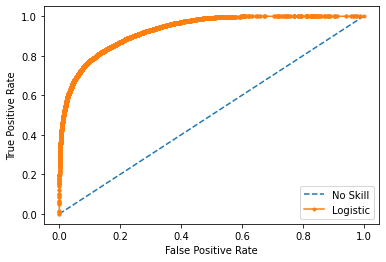

In [11]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test2, lr_probs)
np.save("fpr_LR", fpr)
np.save("tpr_LR", tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

SVM: f1=0.743 auc=0.844
0.24687917319862973


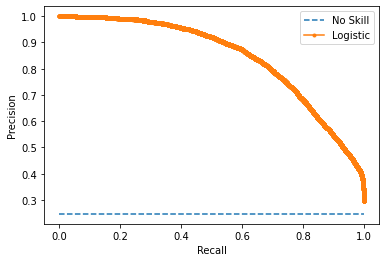

In [12]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test2, lr_probs)
np.save("lrp_LR", lr_precision)
np.save("lrr_LR", lr_recall)
lr_f1, lr_auc = f1_score(y_test2, y_pred2), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test2[y_test2==1]) / len(y_test2)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()